# Genetic Optimization Algorithm 

This algorithm is written to use as an optimizer based on genetic rules

![Evolutionary Stages](1.jpg)

Evolutionary Algorithm 
الگوریتم های تکاملی یا الگوریتم های فرگشتی

![Evolution](2.png)

Selection: The best fitted agent will survive (also known as natural selection) انتخاب

Reproduction: Self-Replication تولید مثل

Mutation: genetic mutation could be both harmfull or beneficial جهش ژنتیکی

![Genotype & Phenotype](3.jpg)

### Genetic Algorithm Steps:
1) Initialization: Create a random population

2) Evaluation: Find the fitness of each genotype 

3) Selection: Mating process

4) Reproduction: Offspring creation

5) Mutation: Randomly change the attributes of the genotype

6) Population replacement: Merge the offspring and parents and create the new generation

7) Termination condition: Loop from step 2 until the termination condition is fulfilled

8) End

![Genetic Steps](4.png)

### Termination Conditions:
    
    When there has been no improvement in the population for X iterations.
    When we reach an absolute number of generations.
    When the objective function value has reached a certain pre-defined value.


In [1]:
import random
import matplotlib.pyplot as plt

### Define the problem

In [2]:
def problem(x):   # x is a vector(list)
    z = sum(i**2 for i in x)
    return z

### Define the problem's hyperparameters

In [5]:
costFunction = problem

nGenes = 10        # number of var.

geneMin = -5        # lower bound of var.
geneMax = 5         # upper bound of var.

### Optimizer Parameters (Genetic)

In [6]:
nGenerations = 1000
populationSize = 50

pCrossover = 0.7
nCrossover = round(pCrossover * populationSize
                   / 2) * 2

pMutation = 0.2
nMutation = round(pMutation * populationSize)

### Define GA Operators

In [15]:
# crossover function
def crossover(parent1,parent2): # parents are vectors(list)
    
    alpha = 0.5
    y = [random.uniform(-alpha,1+alpha) for _ in parent1]
    
    offspring1 = []
    offspring2 = []
    
    for i,j,k in zip(parent1,parent2,y):
        t = k*i + (1-k)*j
        u = k*j + (1-k)*i
        offspring1.append(min(max(t, geneMin),geneMax))
        offspring2.append(min(max(u, geneMin),geneMax))
    
    
    return offspring1,offspring2


# mutate function
def mutate(agent):   # agents is a list
    i = random.choice(range(nGenes))
    sigma = (geneMax - geneMin) / 10
    agent[i] = min(max(agent[i] + sigma * random.gauss(0,1), geneMin), geneMax)                      
    return agent

# sort population
def sortPopulation(x): #x is a list of objects
    return sorted(x,key=lambda t:t.cost)


### Initialization

In [16]:
# empty class to hold agents data
class EmptyParticles:
    def __init__(self):
        self.genome = []
        self.cost = 1000


class Particles:
    
    def __init__(self):
        self.genome = [random.uniform(geneMin,geneMax) for _ in range(nGenes)]
        self.cost = costFunction(self.genome)


# create population
pop = [Particles() for _ in range(populationSize)]

# sort population
sorted_pop = sortPopulation(pop)

bestSolution = sorted_pop[0].cost

bestCosts = [bestSolution] 


### GA Main Loop

In [17]:
for gen in range(nGenerations):
    
    # selection & crossover
    popc = [EmptyParticles() for _ in range(nCrossover)]
    
    for k in range(int(nCrossover/2)):
        
        i1 = random.randint(0, (populationSize-1))
        i2 = random.randint(0, (populationSize-1))
        
        p1 = pop[i1]
        p2 = pop[i2]
        
        o1,o2 = crossover(p1.genome,p2.genome)
        popc[k*2].genome = o1
        popc[k*2+1].genome = o2
        
        popc[k*2].cost = costFunction(o1)
        popc[k*2+1].cost = costFunction(o2)
    
    # selection & mutation
    popm = [EmptyParticles() for _ in range(nMutation)]
    
    for k in range(nMutation):
        
        p = random.choice(pop)
        
        popm[k].genome = mutate(p.genome)
        popm[k].cost = costFunction(popm[k].genome)
    
    # merge population
    pop_overall = pop + popc + popm
    
    # sort population
    sorted_pop = sortPopulation(pop_overall)
    
    # truncate
    pop = sorted_pop[:populationSize]
    
    # update best solution
    bestSolution = pop[0].cost
    bestCosts.append(bestSolution)
    
    # show generation information
    print('Generation {}: Best Cost = {}'.format(gen, bestSolution))

Generation 0: Best Cost = 19.02904091019307
Generation 1: Best Cost = 19.02904091019307
Generation 2: Best Cost = 13.23074926325063
Generation 3: Best Cost = 13.23074926325063
Generation 4: Best Cost = 13.23074926325063
Generation 5: Best Cost = 6.605339812136926
Generation 6: Best Cost = 6.605339812136926
Generation 7: Best Cost = 6.605339812136926
Generation 8: Best Cost = 6.605339812136926
Generation 9: Best Cost = 5.629041540769332
Generation 10: Best Cost = 2.924133448534863
Generation 11: Best Cost = 2.924133448534863
Generation 12: Best Cost = 2.924133448534863
Generation 13: Best Cost = 2.924133448534863
Generation 14: Best Cost = 2.924133448534863
Generation 15: Best Cost = 2.069308049121375
Generation 16: Best Cost = 1.2600216310291026
Generation 17: Best Cost = 1.2600216310291026
Generation 18: Best Cost = 1.2600216310291026
Generation 19: Best Cost = 0.779975997836658
Generation 20: Best Cost = 0.779975997836658
Generation 21: Best Cost = 0.779975997836658
Generation 22: Be

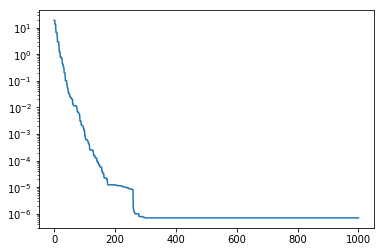

In [18]:
plt.semilogy(bestCosts)
plt.show()